## Homework 1 Cybersecurity
* Sebastián Navarro 00321588
* Eduardo Guerrero
* Mateo Pozo

## Exercise 2
Prove that if a cryptosystem has perfect secrecy and |K|= |C|= |P|, then every ciphertext is equally probable.

## Exercise 3
Suppose that APNDJI or XYGROBO are ciphertexts that are obtained from encryption using the Shift Cipher. Show in each case that there are two "meaningful" plaintexts that could encrypt to the given ciphertext. 

In [4]:
# Shift Cipher
def shift_cipher_forward(text, shift):
    result = ""
    for i in range(len(text)):
        char = text[i]
        if char.isupper():
            result += chr((ord(char) + shift - 65) % 26 + 65)
        else:
            result += chr((ord(char) + shift - 97) % 26 + 97)
    return result

def shift_cipher_backward(text, shift):
    result = ""
    for i in range(len(text)):
        char = text[i]
        if char.isupper():
            result += chr((ord(char) - shift - 65) % 26 + 65)
        else:
            result += chr((ord(char) - shift - 97) % 26 + 97)
    return result

def brute_force(text):
    print("Forward:")
    for i in range(1, 26):
        print(f"Shift {i}: {shift_cipher_forward(text, i)}")

In [5]:
cypher_text = "APNDJI"
brute_force(cypher_text)

Forward:
Shift 1: BQOEKJ
Shift 2: CRPFLK
Shift 3: DSQGML
Shift 4: ETRHNM
Shift 5: FUSION
Shift 6: GVTJPO
Shift 7: HWUKQP
Shift 8: IXVLRQ
Shift 9: JYWMSR
Shift 10: KZXNTS
Shift 11: LAYOUT
Shift 12: MBZPVU
Shift 13: NCAQWV
Shift 14: ODBRXW
Shift 15: PECSYX
Shift 16: QFDTZY
Shift 17: RGEUAZ
Shift 18: SHFVBA
Shift 19: TIGWCB
Shift 20: UJHXDC
Shift 21: VKIYED
Shift 22: WLJZFE
Shift 23: XMKAGF
Shift 24: YNLBHG
Shift 25: ZOMCIH


The two "meaningful" plaintexts that can be identified in the case of the ciphertext APNDJI are:

* Shift 5: FUSION
* Shift 11: LAYOUT

In [6]:
cypher_text = "XYGROBO"
brute_force(cypher_text)

Forward:
Shift 1: YZHSPCP
Shift 2: ZAITQDQ
Shift 3: ABJURER
Shift 4: BCKVSFS
Shift 5: CDLWTGT
Shift 6: DEMXUHU
Shift 7: EFNYVIV
Shift 8: FGOZWJW
Shift 9: GHPAXKX
Shift 10: HIQBYLY
Shift 11: IJRCZMZ
Shift 12: JKSDANA
Shift 13: KLTEBOB
Shift 14: LMUFCPC
Shift 15: MNVGDQD
Shift 16: NOWHERE
Shift 17: OPXIFSF
Shift 18: PQYJGTG
Shift 19: QRZKHUH
Shift 20: RSALIVI
Shift 21: STBMJWJ
Shift 22: TUCNKXK
Shift 23: UVDOLYL
Shift 24: VWEPMZM
Shift 25: WXFQNAN


The two "meaningful" plaintexts that can be identified in the case of the ciphertext XYGROBO are:

* Shift 3: ADJURER
* Shift 16: NOWHERE

## Exercise 4
Compute H(K|C) and H(K|P, C) for the Affine Cipher, assuming that keys are used equiprobably and the plaintexts are equiprobable.

## Exercise 5.1
Substitution Cipher:

EMGLOSUDCGDNCUSWYSFHNSFCYKDPUMLWGYICOXYSIPJCKQPKUGKMGOLICGINCGACKSNISACYKZSCKXECJCKSHYSXCGOIDPKZCNKSHICGIWYGKKGKGOLDSILKGOIUSIGLEDSPWZUGFZCCNDGYYSFUSZCNXEOJNCGYEOWEUPXEZGACGNFGLKNSACIGOIYCKXCJUCIUZCFZCCNDGYYSFEUEKUZCSOCFZCCNCIACZEJNCSHFZEJZEGMXCYHCJUMGKUCY

## Exercise 5.2
Vigenere Cipher:

KCCPKBGUFDPHQTYAVINRRTMVGRKDNBVFDETDGILTXRGUDDKOTFMBPVGEGLTGCKQRACQCWDNAWCRXIZAKFTLEWRPTYCQKYVXCHKFTPONCQQRHJVAJUWETMCMSPKQDYHJVDAHCTRLSVSKCGCZQQDZXGSFRLSWCWSJTBHAFSIASPRJAHKJRJUMVGKMITZHFPDISPZLVLGWTFPLKKEBDPGCEBSHCTJRWXBAFSPEZQNRWXCVYCGAONWDDKACKAWBBIKFTIOVKCGGHJVLNHIFFSQESVYCLACNVRWBBIREPBBVFEXOSCDYGZWPFDTKFQIYCWHJVLNHIQIBTKHJVNPIST

We know that the ciphertext corresponds to a Vigenere cipher. So we can start by determining the key length using the Friedman test, which relies on frequency analysis to estimate how likely it is that two random letters in the ciphertext match. This test gives us an approximation of the key length by calculating the match rate of the ciphertext and comparing it to the expected match rate of an English text.

Key Length 1: Avg IC: 0.0409
Key Length 2: Avg IC: 0.0428
Key Length 3: Avg IC: 0.0508
Key Length 4: Avg IC: 0.0417
Key Length 5: Avg IC: 0.0393
Key Length 6: Avg IC: 0.0628
Key Length 7: Avg IC: 0.0412
Key Length 8: Avg IC: 0.0410
Key Length 9: Avg IC: 0.0491


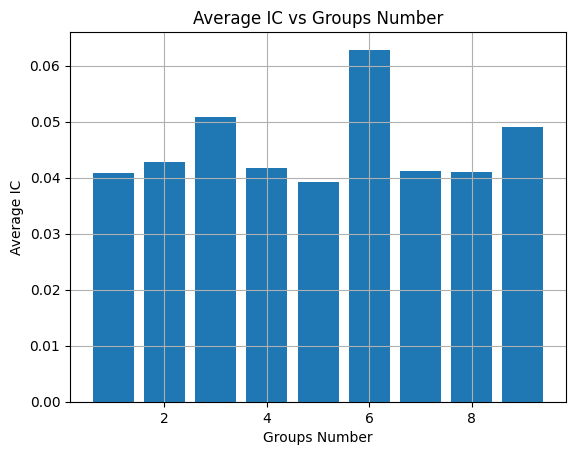

In [47]:
import matplotlib.pyplot as plt

# Friedman Test
def calculate_IC(text):
    Alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    counts = {char: 0 for char in Alphabet}
    numerator = 0
    denominator = len(text) * (len(text) - 1)
    for char in text:
        if char in Alphabet:
            counts[char] += 1
            
    for char in Alphabet:
        numerator += counts[char] * (counts[char] - 1)
    return numerator / denominator

# Divide the text into n groups
def divide_text(text, n):
    return [text[i::n] for i in range(n)]

text = 'KCCPKBGUFDPHQTYAVINRRTMVGRKDNBVFDETDGILTXRGUDDKOTFMBPVGEGLTGCKQRACQCWDNAWCRXIZAKFTLEWRPTYCQKYVXCHKFTPONCQQRHJVAJUWETMCMSPKQDYHJVDAHCTRLSVSKCGCZQQDZXGSFRLSWCWSJTBHAFSIASPRJAHKJRJUMVGKMITZHFPDISPZLVLGWTFPLKKEBDPGCEBSHCTJRWXBAFSPEZQNRWXCVYCGAONWDDKACKAWBBIKFTIOVKCGGHJVLNHIFFSQESVYCLACNVRWBBIREPBBVFEXOSCDYGZWPFDTKFQIYCWHJVLNHIQIBTKHJVNPIST'

num_groups = range(1, 10)
average_ICs = []

for i in num_groups:
    groups = divide_text(text, i)
    group_IC = {i: calculate_IC(group) for i, group in enumerate(groups)}
    average_IC = sum(group_IC.values()) / len(group_IC)
    average_ICs.append(average_IC)
    print(f'Key Length {i}: Avg IC: {average_IC:.4f}')

# Graficar los valores de average_IC vs número de grupos como un diagrama de barras
plt.bar(num_groups, average_ICs)
plt.xlabel('Groups Number')
plt.ylabel('Average IC')
plt.title('Average IC vs Groups Number')
plt.grid(True)
plt.show()

By looking the plot of the match rate, we can see that the most probable **key length is 6**. Then, we can divide the ciphertext into 6 groups and solve each group as a Caesar cipher. For that, we can use a fitness function to evaluate the quality of the decryption for each possible key letter. The fitness function is based on the frequency of the letters in the English language.

In this code, we will get the best two possible keys for each group that gives us the best fitness score.

Group: 1 : KGQNGVGGTGCQWAWQHNJEPJTKQFWAPJGHPWKCTAQVNCIVJFVNIVCPQJQJT
Best Keys: ('C', 'P')


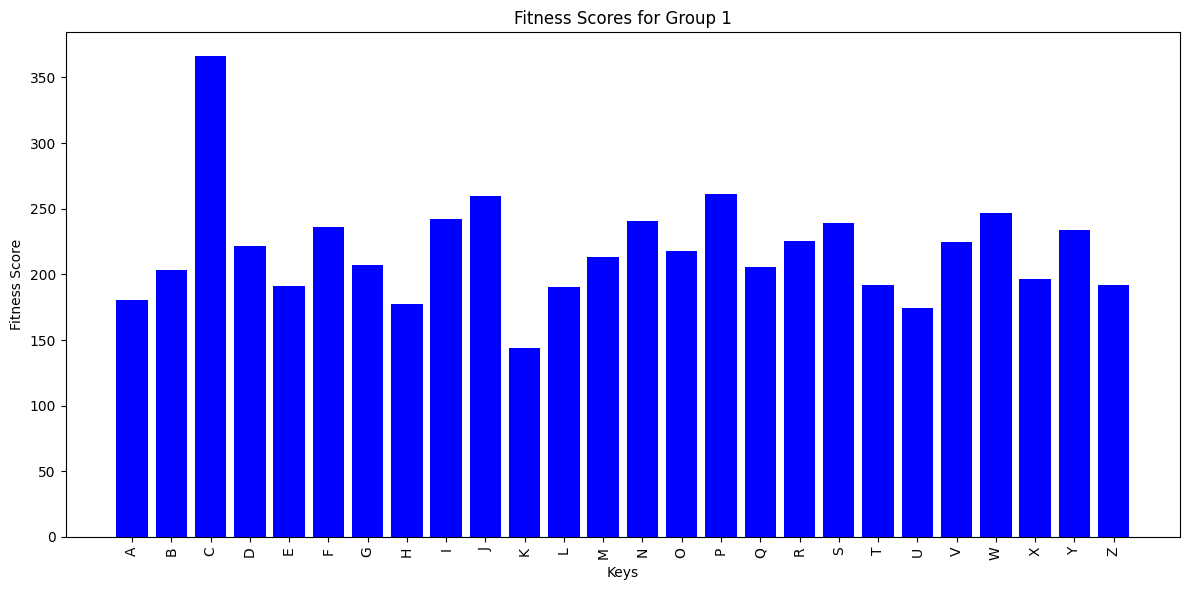

Group: 2 : CUTRRFIUFEKCCKRKKCVTKVRCDRSFRRKFZTEEJFNYWKKKVFYVRFDFIVIV
Best Keys: ('R', 'C')


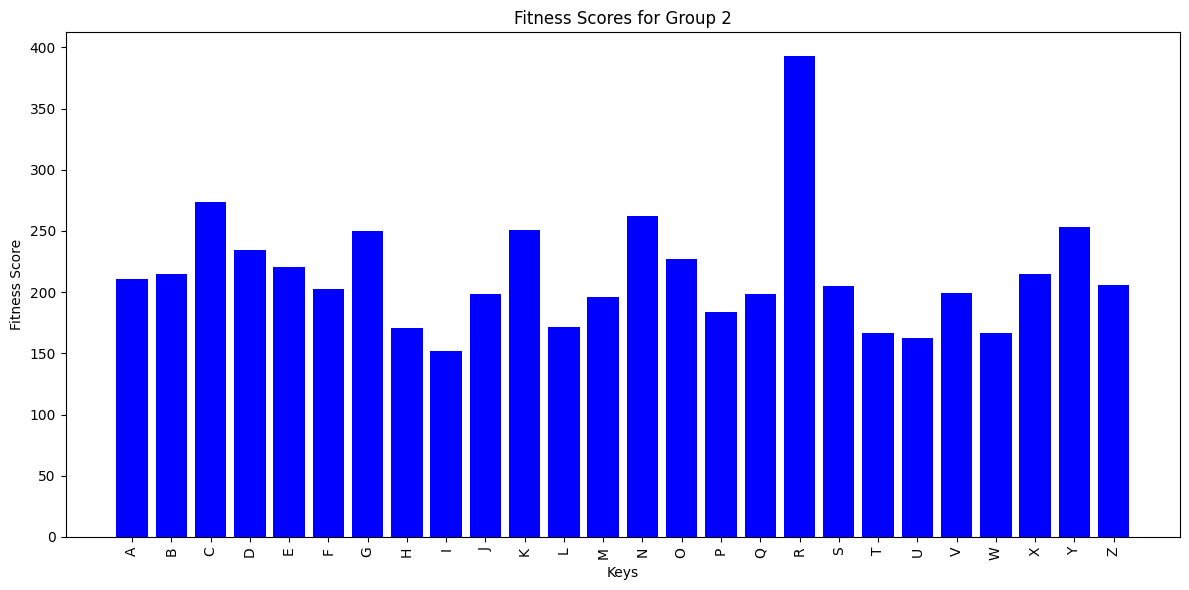

Group: 3 : CFYRKDLDMGQWRFPYFQAMQDLGZLJSJJMPLFBBRSRCDAFCLSCREEYDYLBN
Best Keys: ('Y', 'L')


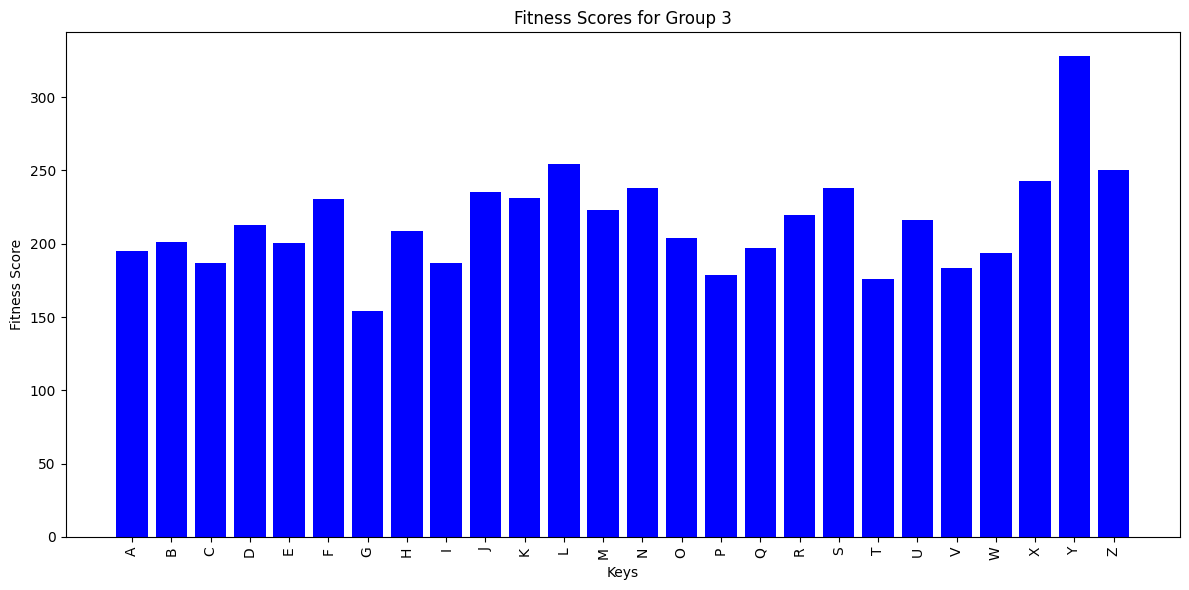

Group: 4 : PDATDETDBLRDXTTVTQJCDASCXSTIAUIDVPDSWPWGDWTGNQLWPXGTCNTP
Best Keys: ('P', 'L')


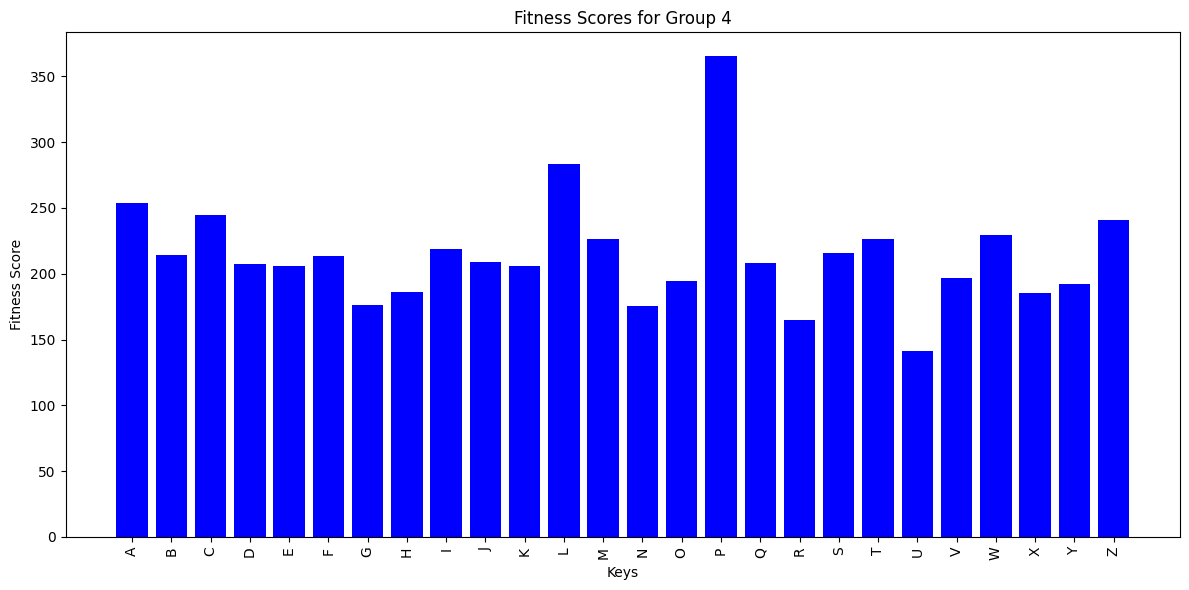

Group: 5 : KPVMNTXKPTANILYXPRUMYHVZGWBAHMTILLPHXEXAKBIGHEABBOZKWHKI
Best Keys: ('T', 'I')


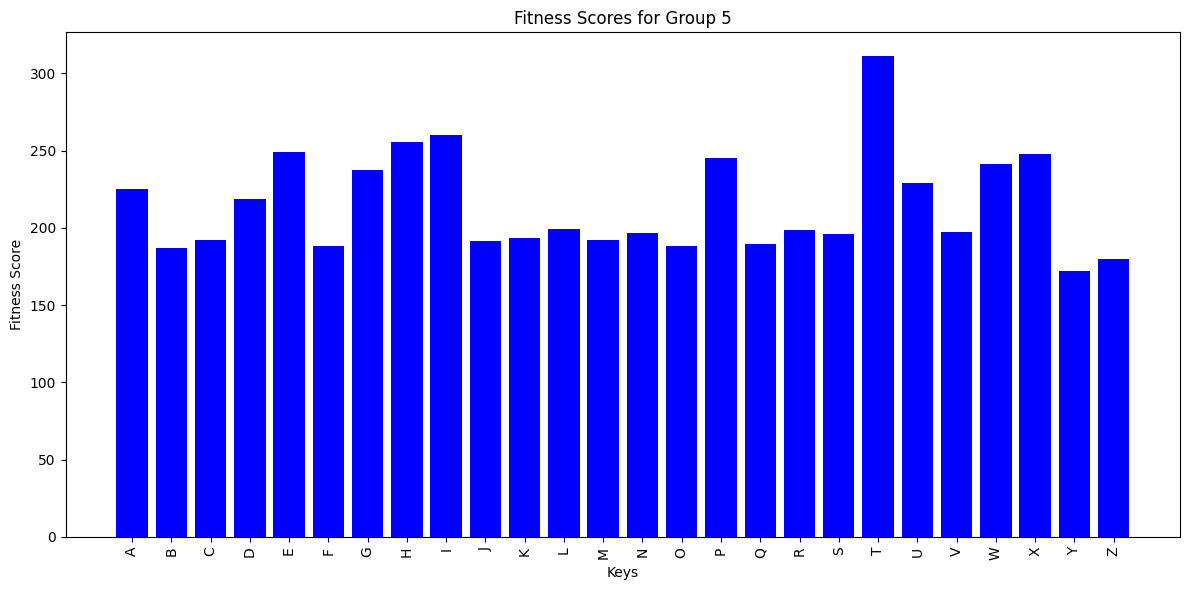

Group: 6 : BHIVBDROVGCAZECCOHWSHCSQSCHSKVZSGKGCBZCOABOHISCBBSWFHIHS
Best Keys: ('O', 'Z')


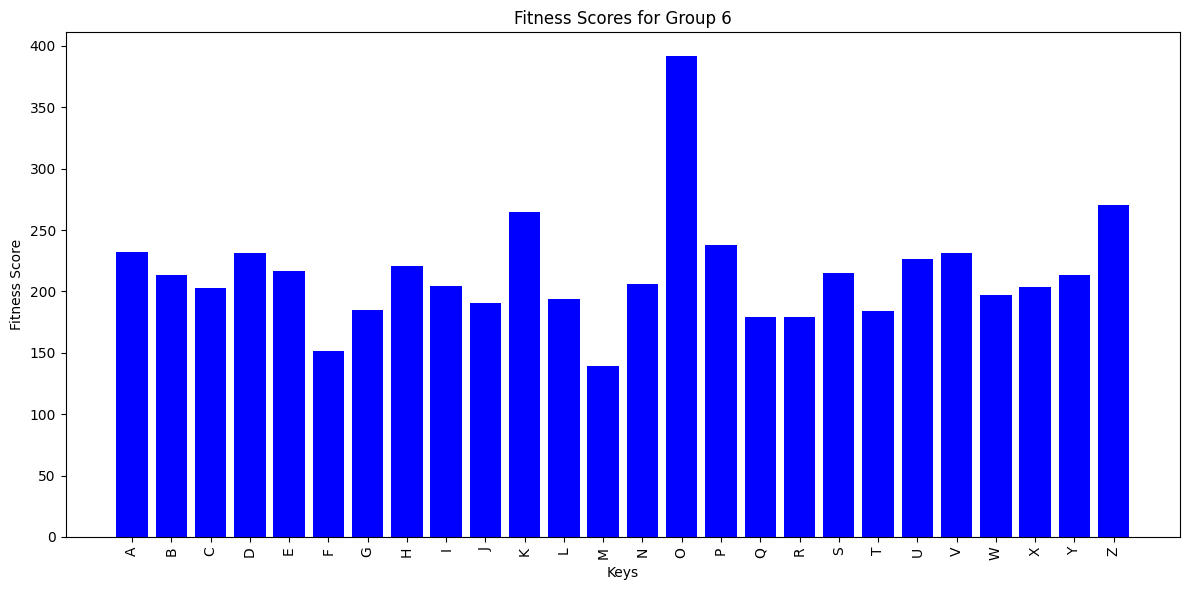

In [55]:
import matplotlib.pyplot as plt

# Variable to store the best keys for each group
stored_keys = {}

# Divide the ciphertext into groups
groups = divide_text(text, 6)

# Fitness function to calculate the score of a plaintext
def fitness(pt):
    english_frequencies = {
        'E': 12.02, 'T': 9.10, 'A': 8.12, 'O': 7.68,
        'I': 7.00, 'N': 6.95, 'S': 6.28, 'H': 6.09,
        'R': 5.99, 'D': 4.25, 'L': 4.03, 'C': 2.78,
        'U': 2.76, 'M': 2.41, 'W': 2.36, 'F': 2.23,
        'G': 2.02, 'Y': 1.97, 'P': 1.93, 'B': 1.49,
        'V': 0.98, 'K': 0.77, 'J': 0.15, 'X': 0.15,
        'Q': 0.10, 'Z': 0.07
    }
    
    score = 0
    for letter in pt:
        if letter in english_frequencies:
            score += english_frequencies[letter]
    return score

# Function to decrypt a Vigenere ciphertext
def decrypt_vigenere(ciphertext, key):
    plaintext = ''
    key_length = len(key)
    for i, char in enumerate(ciphertext):
        key_char = key[i % key_length]
        shift = ord(key_char) - ord('A')
        plaintext += chr((ord(char) - ord('A') - shift) % 26 + ord('A'))
    return plaintext

# Iterate over the groups and find the best key for each group
for i, group in enumerate(groups):
    keys = []
    scores = []
    alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    for char in alphabet:
        key = char
        pt = decrypt_vigenere(group, key)
        fitness_score = fitness(pt)
        keys.append(f'{key}')
        scores.append(fitness_score)      
        
    print(f'Group: {i +1} : {group}')
    
    # Order the keys and scores in descending order
    sorted_keys_scores = sorted(zip(keys, scores), key=lambda x: x[1], reverse=True)
    sorted_keys, sorted_scores = zip(*sorted_keys_scores)
    
    # Store the 2 best keys for each group
    stored_keys[i + 1] = sorted_keys[:2]
    
    print(f'Best Keys: {stored_keys[i+1]}')
    
    # Plot the fitness scores for each key
    plt.figure(figsize=(12, 6))
    plt.bar(keys, scores, color='blue')
    plt.xlabel('Keys')
    plt.ylabel('Fitness Score')
    plt.title(f'Fitness Scores for Group {i+1}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

The best two keys obtained for each group are:

* Group 1: 'C' and 'P'
* Group 2: 'R' and 'C'
* Group 3: 'Y' and 'L'
* Group 4: 'P' and 'L'
* Group 5: 'T' and 'Y'
* Group 6: 'O' and 'Z'

Then, we can get all possible combinations of the keys (6^2) and decrypt the ciphertext using the Vigenere cipher. Finally, we can check the key that gives the decryption with the most fitness.

In [61]:
# Function to generate all possible keys
def generate_keys(stored_keys):
    keys = []
    for key1 in stored_keys[1]:
        for key2 in stored_keys[2]:
            for key3 in stored_keys[3]:
                for key4 in stored_keys[4]:
                    for key5 in stored_keys[5]:
                        for key6 in stored_keys[6]:
                            key = key1 + key2 + key3 + key4 + key5 + key6
                            keys.append(key)
    return keys

keys = generate_keys(stored_keys)

# Decrypt the text using the keys and print the fitness score
for key in keys:
    print(f'Key: {key} Fitness: {fitness(decrypt_vigenere(text, key)):.2f}')


Key: CRYPTO Fitness: 2154.05
Key: CRYPTZ Fitness: 2032.74
Key: CRYPIO Fitness: 2103.49
Key: CRYPIZ Fitness: 1982.18
Key: CRYLTO Fitness: 2071.92
Key: CRYLTZ Fitness: 1950.61
Key: CRYLIO Fitness: 2021.36
Key: CRYLIZ Fitness: 1900.05
Key: CRLPTO Fitness: 2080.35
Key: CRLPTZ Fitness: 1959.04
Key: CRLPIO Fitness: 2029.79
Key: CRLPIZ Fitness: 1908.48
Key: CRLLTO Fitness: 1998.22
Key: CRLLTZ Fitness: 1876.91
Key: CRLLIO Fitness: 1947.66
Key: CRLLIZ Fitness: 1826.35
Key: CCYPTO Fitness: 2034.86
Key: CCYPTZ Fitness: 1913.55
Key: CCYPIO Fitness: 1984.30
Key: CCYPIZ Fitness: 1862.99
Key: CCYLTO Fitness: 1952.73
Key: CCYLTZ Fitness: 1831.42
Key: CCYLIO Fitness: 1902.17
Key: CCYLIZ Fitness: 1780.86
Key: CCLPTO Fitness: 1961.16
Key: CCLPTZ Fitness: 1839.85
Key: CCLPIO Fitness: 1910.60
Key: CCLPIZ Fitness: 1789.29
Key: CCLLTO Fitness: 1879.03
Key: CCLLTZ Fitness: 1757.72
Key: CCLLIO Fitness: 1828.47
Key: CCLLIZ Fitness: 1707.16
Key: PRYPTO Fitness: 2049.59
Key: PRYPTZ Fitness: 1928.28
Key: PRYPIO Fi

Finally, the key with the best fitness is 'CRYPTO'. We use that key to decrypt the ciphertext and get the plaintext.

In [60]:
key = 'CRYPTO'
ciphertext = 'KCCPKBGUFDPHQTYAVINRRTMVGRKDNBVFDETDGILTXRGUDDKOTFMBPVGEGLTGCKQRACQCWDNAWCRXIZAKFTLEWRPTYCQKYVXCHKFTPONCQQRHJVAJUWETMCMSPKQDYHJVDAHCTRLSVSKCGCZQQDZXGSFRLSWCWSJTBHAFSIASPRJAHKJRJUMVGKMITZHFPDISPZLVLGWTFPLKKEBDPGCEBSHCTJRWXBAFSPEZQNRWXCVYCGAONWDDKACKAWBBIKFTIOVKCGGHJVLNHIFFSQESVYCLACNVRWBBIREPBBVFEXOSCDYGZWPFDTKFQIYCWHJVLNHIQIBTKHJVNPIST'
print(decrypt_vigenere(ciphertext, key))

ILEARNEDHOWTOCALCULATETHEAMOUNTOFPAPERNEEDEDFORAROOMWHENIWASATSCHOOLYOUMULTIPLYTHESQUAREFOOTAGEOFTHEWALLSBYTHECUBICCONTENTSOFTHEFLOORANDCEILINGCOMBINEDANDDOUBLEITYOUTHENALLOWHALFTHETOTALFOROPENINGSSUCHASWINDOWSANDDOORSTHENYOUALLOWTHEOTHERHALFFORMATCHINGTHEPATTERNTHENYOUDOUBLETHEWHOLETHINGAGAINTOGIVEAMARGINOFERRORANDTHENYOUORDERTHEPAPER


## Exercise 5.3
Affine Cipher:

KQEREJEBCPPCJCRKIEACUZBKRVPKRBCIBQCARBJCVFCUPKRIOFKPACUZQEPBKRXPEIIEABDKPBCPFCDCCAFIEABDKPBCPFEQPKAZBKRHAIBKAPCCIBURCCDKDCCJCIDFUIXPAFFERBICZDFKABICBBENEFCUPJCVKABPCYDCCDPKBCOCPERKIVKSCPICBRKIJPKABI

In [1]:
ciphertext = 'KQEREJEBCPPCJCRKIEACUZBKRVPKRBCIBQCARBJCVFCUPKRIOFKPACUZQEPBKRXPEIIEABDKPBCPFCDCCAFIEABDKPBCPFEQPKAZBKRHAIBKAPCCIBURCCDKDCCJCIDFUIXPAFFERBICZDFKABICBBENEFCUPJCVKABPCYDCCDPKBCOCPERKIVKSCPICBRKIJPKABI'

To break the cipher, we will use a brute force approach. Thus, we will try all the possible values of a (the multiplicative key), taking into account that a and m must be coprime. Also, we must take into account that the additive key will be in the range of 0 to 26.

In [2]:
# Function to find the gdc
def gdc(a, b):
  if b == 0:
    return a
  else:
    return gdc(b, a % b)

# Function to find the multiplicative modular inverse
def modular_inverse(a, m):
  if gdc(a, m) != 1:
    return None
  else:
    for x in range(1, m):
      if (a * x) % m == 1:
        return x

In [3]:
# Function to decrypt Affine Cipher given a and b
def decrypt_affine(ciphertext, a, b):
    plaintext = []
    # Convert to uppercase
    ciphertext = ciphertext.upper()
    # Iterate over the ciphertext
    for c in ciphertext:
        if c.isalpha():
            # Decrypt the letter
            decrypted_char = (modular_inverse(a, 26) * (ord(c) - ord('A') - b)) % 26
            plaintext.append(chr(decrypted_char + ord('A')))
        else:
            # Keep non-alphabetic characters unchanged
            plaintext.append(c)
    return ''.join(plaintext)

In [4]:
# Initialize a list of coprime numbers to 26
possible_a = []
for i in range(1, 27):
  if gdc(i, 26) == 1:
    possible_a.append(i)

In [5]:
# Possible b values will be in the range of 1 to 26
possible_b = list(range(1, 27))

Once we have the lists with all the possible values of a and b, we try all the possible combinations and score them. The frequency distribution was taken from: https://www3.nd.edu/~busiforc/handouts/cryptography/letterfrequencies.html

In [7]:
# Letter frequency distribution of the English alphabet
letter_frequencies = {
    'E': 11.1607, 'A': 8.4966, 'R': 7.5809, 'I': 7.5448, 'O': 7.1635, 'T': 6.9509,
    'N': 6.6544, 'S': 5.7351, 'L': 5.4893, 'C': 4.5388, 'U': 3.6308, 'D': 3.3844,
    'P': 3.1671, 'M': 3.0129, 'H': 3.0034, 'G': 2.4705, 'B': 2.0720, 'F': 1.8121,
    'Y': 1.7779, 'W': 1.2899, 'K': 1.1016, 'V': 1.0074, 'X': 0.2902, 'Z': 0.2722,
    'J': 0.1965, 'Q': 0.1962
}

# Score the possible plaintext
def score_plaintext(plaintext):
  score = 0
  frequencies = {}

  # Iterate over the letters and update frequencies
  for letter in plaintext:
    if letter in frequencies:
      frequencies[letter] += 1
    else:
      frequencies[letter] = 1

  # Iterate over the dictionary and compare frequencies
  for letter, count in frequencies.items():
    observed_frequency = count / len(plaintext) * 100
    expected_frequency = letter_frequencies.get(letter, 0)
    score += (observed_frequency - expected_frequency) ** 2

  # Return the negative score to rank the most simmilar distribution higher
  return -score

In [8]:
# Initialize possible plaintexts list
possible_plaintexts = []

# Try all the possible combinations
for a in possible_a:
  for b in possible_b:
    plaintext = decrypt_affine(ciphertext, a, b)
    possible_plaintexts.append((plaintext, score_plaintext(plaintext), a, b))

possible_plaintexts.sort(key=lambda x: x[1], reverse=True)

# Print the top 5 possible plaintexts
for i in range(5):
  print(f"Possible plaintext {i + 1}: {possible_plaintexts[i][0]}")
  print(f"Score: {possible_plaintexts[i][1]}")
  print(f"a: {possible_plaintexts[i][2]}")
  print(f"b: {possible_plaintexts[i][3]}")
  print()

Possible plaintext 1: OCANADATERREDENOSAIEUXTONFRONTESTCEINTDEFLEURONSGLORIEUXCARTONBRASSAITPORTERLEPEEILSAITPORTERLACROIXTONHISTOIREESTUNEEPOPEEDESPLUSBRILLANTSEXPLOITSETTAVALEURDEFOITREMPEEPROTEGERANOSFOYERSETNOSDROITS
Score: -93.51337165518926
a: 19
b: 4

Possible plaintext 2: AKQDQHQLERREHEDAOQSEIZLADBRADLEOLKESDLHEBJEIRADOYJARSEIZKQRLADNRQOOQSLXARLERJEXEESJOQSLXARLERJQKRASZLADVSOLASREEOLIDEEXAXEEHEOXJIONRSJJQDLOEZXJASLOELLQFQJEIRHEBASLREGXEEXRALEYERQDAOBAWEROELDAOHRASLO
Score: -214.21814931791658
a: 11
b: 10

Possible plaintext 3: SWOBONOZERRENEBSIOUEQPZSBVRSBZEIZWEUBZNEVTEQRSBIMTSRUEQPWORZSBFROIIOUZJSRZERTEJEEUTIOUZJSRZERTOWRSUPZSBDUIZSUREEIZQBEEJSJEENEIJTQIFRUTTOBZIEPJTSUZIEZZOHOTEQRNEVSUZREKJEEJRSZEMEROBSIVSGERIEZBSINRSUZI
Score: -252.34832850205794
a: 21
b: 22

Possible plaintext 4: JDPCPKPSREERKRCJLPTRZUSJCYEJCSRLSDRTCSKRYORZEJCLFOJETRZUDPESJCWEPLLPTSQJESREORQRRTOLPTSQJESREOPDEJTUSJCMTLSJTERRLSZCRRQJQRRKRLQOZLWETOOPCSLRUQOJTSLRSSPGPORZEKRYJTSERVQRRQEJSRFREPCJLYJBRELRSCJLKEJTS

Therefore, the keys are a=19, b=4

## Exercise 5.4
unspecified cipher:

BNVSNSIHQCEELSSKKYERIFJKXUMBGYKAMQLJTYAVFBKVTDVBPVVRJYYLAOKYMPQSCGDLFSRLLPROYGESEBUUALRWXMMASAZLGLEDFJBZAVVPXWICGJXASCBYEHOSNMULKCEAHTQOKMFLEBKFXLRRFDTZXCIWBJSICBGAWDVYDHAVFJXZIBKCGJIWEAHTTOEWTUHKRQVVRGZBXYIREMMASCSPBNLHJMBLRFFJELHWEYLWISTFVVYFJCMHYUYRUFSFMGESIGRLWALSWMNUHSIMYYITCCQPZSICEHBCCMZFEGVJYOCDEMMPGHVAAUMELCMOEHVLTIPSUYILVGFLMVWDVYDBTHFRAYISYSGKVSUUHYHGGCKTMBLRX